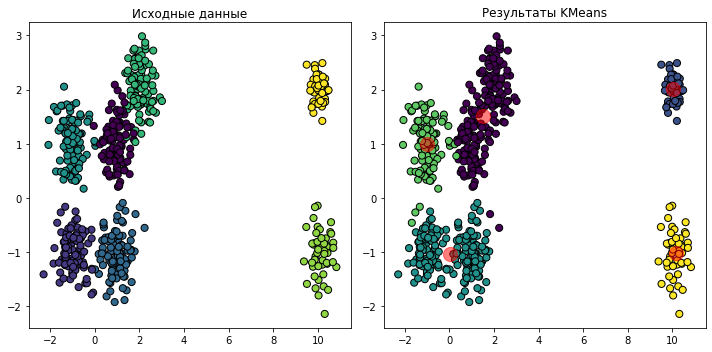

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min

# Создаем искусственный датасет
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1], [2, 2], [10, -1], [10, 2]]  # Центры предполагаемых кластеров
cluster_std = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2]  # Стандартные отклонения кластеров
X, y = make_blobs(n_samples=[100, 100, 100, 100, 100, 50, 50], centers=centers, cluster_std=cluster_std, random_state=42, shuffle=True)

# Визуализация исходного датасета
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Исходные данные')

# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters= 5, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Визуализация результатов кластеризации
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Результаты KMeans')

plt.tight_layout()
plt.show()

## Вариант 1: переназначаем все маленькие кластеры сразу

In [2]:
def reassign_small_clusters_all(X, labels, min_size):
    labels_update = labels.copy()
    unique, counts = np.unique(labels, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    small_clusters = [k for k, v in cluster_sizes.items() if v < min_size]

    # Индексы точек в малом кластере
    points_idx = np.where(np.isin(labels_update, small_clusters))[0]
    # Индексы остальных точек, исключая мелкие кластеры
    other_points_idx = np.where(~np.isin(labels_update, small_clusters))[0]

    # Ближайшие кластеры к точкам малого кластера
    closest_clusters, _ = pairwise_distances_argmin_min(X[points_idx], X[other_points_idx])
    new_labels = labels_update[other_points_idx][closest_clusters]

    labels_update[points_idx] = new_labels

    return labels_update

In [3]:
# Проверка результатов
unique, counts = np.unique(y_kmeans, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} points")

Cluster 0: 199 points
Cluster 1: 50 points
Cluster 2: 194 points
Cluster 3: 107 points
Cluster 4: 50 points


In [4]:
# Переназначение малых кластеров
labels_new = reassign_small_clusters_all(X, y_kmeans, 100)

# Проверка результатов
unique, counts = np.unique(labels_new, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} points")

Cluster 0: 299 points
Cluster 2: 194 points
Cluster 3: 107 points


Text(0.5, 1.0, 'Результаты после переназначения KMeans')

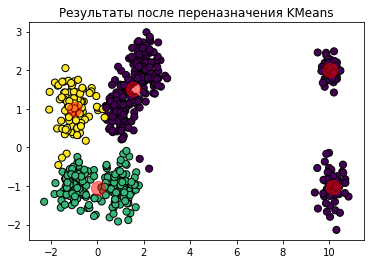

In [5]:
# Визуализация результатов кластеризации
plt.plot()
plt.scatter(X[:, 0], X[:, 1], c=labels_new, cmap='viridis', marker='o', edgecolor='k', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Результаты после переназначения KMeans')

## Вариант 2: переназначаем кластеры по одному и проверяем полученные кластеры на размер, здесь мелкие кластеры могут объединиться в один, удовлетворяющий условию

In [6]:
## корректнее будет относить к ближайшему кластеру самый малый и проверять выполнение условий по минимуму

def reassign_small_clusters(X, labels, min_size):
    labels_update = labels.copy()
    unique, counts = np.unique(labels_update, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    small_clusters = [k for k, v in sorted(cluster_sizes.items(), key = lambda x: x[1]) if v < min_size]
    for i in small_clusters:
        # Индексы точек в малом кластере
        points_idx = np.where(np.isin(labels_update, i))[0]

        # Индексы остальных точек, исключая мелкие кластеры
        other_points_idx = np.where(~np.isin(labels_update, i))[0]

       # Ближайшие кластеры к точкам малого кластера
        closest_clusters, _ = pairwise_distances_argmin_min(X[points_idx], X[other_points_idx])
        new_labels = labels_update[other_points_idx][closest_clusters]

        # Назначаем маленькому кластеру лейбл ближайшего
        labels_update[points_idx] = new_labels

        # Обновляем инфо
        unique, counts = np.unique(labels_update, return_counts = True)
        cluster_sizes = dict(zip(unique, counts))
        small_clusters = [k for k, v in sorted(cluster_sizes.items(), key = lambda x: x[1]) if v < min_size]
        if len(small_clusters) == 0:
            return labels_update

In [7]:
# Переназначение малых кластеров
labels_new = reassign_small_clusters(X, y_kmeans, 100)

# Проверка результатов
unique, counts = np.unique(labels_new, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} points")

Cluster 0: 199 points
Cluster 2: 194 points
Cluster 3: 107 points
Cluster 4: 100 points


Text(0.5, 1.0, 'Результаты после переназначения KMeans')

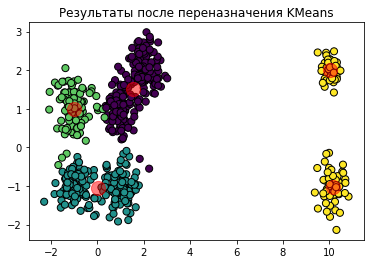

In [8]:
# Визуализация результатов кластеризации
plt.plot()
plt.scatter(X[:, 0], X[:, 1], c=labels_new, cmap='viridis', marker='o', edgecolor='k', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Результаты после переназначения KMeans')